<AxesSubplot:>

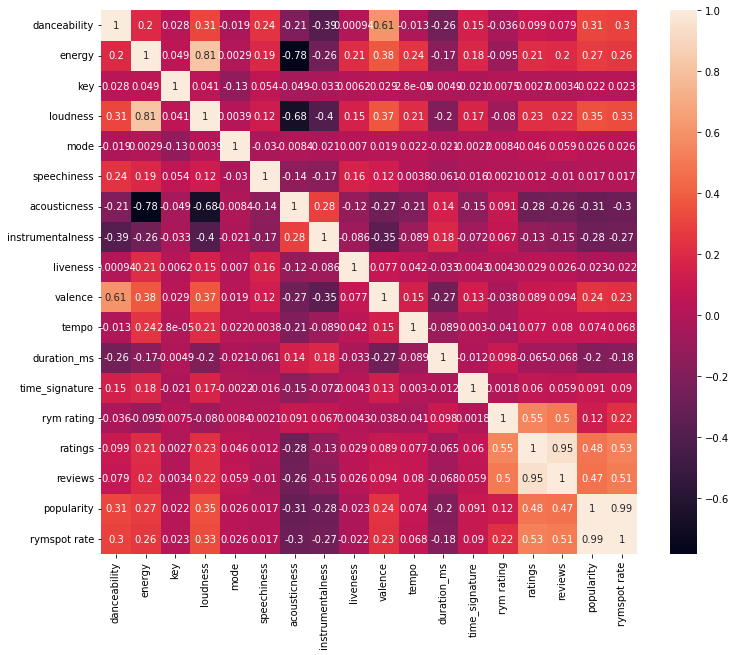

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns 
from collections import defaultdict
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv('../data/final-data.csv', sep='~')
x = range(3,len(df.columns)-1)
df = df.iloc[:,x]
df['rym rating'] = df['rym rating']*20
# p and (1-p ) hyperparameter tuning
df['rymspot rate'] = (df['rym rating']*.5 + df['popularity']*.5)
# df['rymspot rate'] = df['popularity']
df['rymspot rate'].describe()

In [ ]:
labels = []
# >= 73.675 top .25 of our dataset, 73.675-49.62 middle 50%, < 49.62 bottom 25%
for d in df['rymspot rate']:
    labels+=[0 if d >= 73.675 else 1 if d >= 49.62500 else 2]

In [ ]:
x = range(3,len(df.columns)-17)
X = df.iloc[:,x]
X

,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-14.074,0,0.0991,0.90700,0.000004,0.1110,0.377,91.240
1,-14.650,1,0.0704,0.89500,0.000000,0.1110,0.459,141.231
2,-12.273,1,0.0841,0.87600,0.000001,0.1040,0.480,152.197
3,-12.577,1,0.0620,0.79400,0.000000,0.1470,0.483,145.376
4,-11.647,0,0.2490,0.84400,0.000005,0.1120,0.175,64.841
...,...,...,...,...,...,...,...,...
7247,-9.650,1,0.0443,0.00724,0.004210,0.1910,0.775,147.919
7248,-10.027,1,0.0803,0.62800,0.464000,0.0622,0.343,99.975
7249,-12.967,1,0.0284,0.86500,0.684000,0.0876,0.556,86.995
7250,-10.179,1,0.0294,0.57500,0.878000,0.0720,0.394,144.118


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scores = []
for x in range(1,20):
    X_train, X_test, y_train,y_test =train_test_split(
                                         X, labels, test_size = 0.2)
    gnb = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    naive = gnb.fit(X_train,y_train)
    y_pred = naive.predict(X_test)

    scores += [accuracy_score(y_test, y_pred)]
    
print(sum(scores)/len(scores))

0.7348833835104646


In [ ]:
from sklearn.naive_bayes import GaussianNB
scores = []
for x in range(1,20):
    X_train, X_test, y_train,y_test =train_test_split(
                                         X, labels, test_size = 0.2)
    gnb = GaussianNB()
    naive = gnb.fit(X_train,y_train)
    y_pred = naive.predict(X_test)

    scores += [accuracy_score(y_test, y_pred)]
    
print(sum(scores)/len(scores))

0.7089484565998042


In [ ]:
from sklearn import tree

scores = []
for i in range(1,20):
    X_train, X_test, y_train,y_test =train_test_split(
                                             X, labels, test_size = 0.2)
    for x in range(1,100):
        gnb = tree.DecisionTreeClassifier(random_state = 0, max_depth=i)
        naive = gnb.fit(X_train,y_train)
        y_pred = naive.predict(X_test)

        scores += [accuracy_score(y_test, y_pred)]

    print(sum(scores)/len(scores))

0.7064093728463141
0.7129565816678134
0.7096255456007362
0.7134734665747744
0.7164713990351448
0.7206524236158922
0.7202914246332528
0.7216574776016488
0.7205758480741238
0.7189524465885564
0.7188146106133704
0.7157707328279316
0.7138843238085141
0.7122674017918704
0.7112336319779516
0.7085630599586473
0.704787773138202
0.7023891569032843
0.7001342087126796


In [ ]:
from sklearn import tree

scores = []
for x in range(1,500):
    X_train, X_test, y_train,y_test =train_test_split(
                                         X, labels, test_size = 0.2)
    gnb = tree.DecisionTreeClassifier(random_state = 0, max_depth=7)
    naive = gnb.fit(X_train,y_train)
    y_pred = naive.predict(X_test)

    scores += [accuracy_score(y_test, y_pred)]

print(sum(scores)/len(scores))

0.7226610353719151


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(18,28):
    X_train, X_test, y_train,y_test =train_test_split(
                                             X, labels, test_size = 0.2)
    for x in range(1,50):
        gnb = KNeighborsClassifier(n_neighbors=i)
        naive = gnb.fit(X_train,y_train)
        y_pred = naive.predict(X_test)

        scores += [accuracy_score(y_test, y_pred)]

    print(sum(scores)/len(scores))
#     19 nn

0.7215713301171606
0.7150241212956574
0.711922811853892
0.7119228118538928
0.71330117160579
0.7122674017918703
0.7133011716057907
0.7157133011716088
0.7153687112336333
0.7136457615437658


In [ ]:
from sklearn.neural_network import MLPClassifier
scores = []
for x in range(1,100):
    X_train, X_test, y_train,y_test =train_test_split(
                                         X, labels, test_size = 0.2)
    gnb = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    naive = gnb.fit(X_train,y_train)
    y_pred = naive.predict(X_test)

    scores += [accuracy_score(y_test, y_pred)]

print(sum(scores)/len(scores))
#     19 nn

0.7019610300106508


In [ ]:
# %pip install surprise

In [ ]:
# from surprise import KNNWithMeans
# from surprise import Dataset
# from surprise import accuracy
# from surprise import Reader
# from surprise.model_selection import train_test_split



In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# import seaborn as sns 
# from collections import defaultdict
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# df = pd.read_csv('../data/final-data.csv', sep='~')
# x = range(3,len(df.columns)-2)
# df = df.iloc[:,x]
# df['rym rating'] = df['rym rating']*20
# df['Rating'] = (df['rym rating']*.5 + df['popularity']*.5)
# df['Rating'].describe()
# df = df.iloc[:,[12,13,-1]]
# df
# len(np.unique(df.iloc[:,0]))

In [ ]:
# reader = Reader(rating_scale=(1, 100))
# data = Dataset.load_from_df(df,reader)

In [ ]:
# trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [ ]:
# algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
# algo.fit(trainset)

In [ ]:
# test_pred = algo.test(testset)

In [ ]:
# test_pred

In [ ]:
# print("Item-based Model : Test Set")
# accuracy.rmse(test_pred, verbose=True)

https://www.kaggle.com/code/saurav9786/recommender-system-using-amazon-reviews/notebook 

In [ ]:
df = pd.read_csv('../data/final-data.csv', sep='~')
x = range(3,len(df.columns)-1)
df = df.iloc[:,x]
x = list(range(3,len(df.columns)-16))
x+=[14,-1]
X = df.iloc[:,x]
X

,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,sp_genres
0,-14.074,0,0.0991,0.90700,0.000004,0.1110,0.377,91.240,https://api.spotify.com/v1/tracks/5sQGo3fB2NoF...,"['cantautor', 'latin alternative', 'nueva canc..."
1,-14.650,1,0.0704,0.89500,0.000000,0.1110,0.459,141.231,https://api.spotify.com/v1/tracks/1w6mcMacExya...,"['cantautor', 'latin alternative', 'nueva canc..."
2,-12.273,1,0.0841,0.87600,0.000001,0.1040,0.480,152.197,https://api.spotify.com/v1/tracks/33QDwXW1O0hA...,"['cantautor', 'latin alternative', 'nueva canc..."
3,-12.577,1,0.0620,0.79400,0.000000,0.1470,0.483,145.376,https://api.spotify.com/v1/tracks/2ja41V8fXBHR...,"['cantautor', 'latin alternative', 'nueva canc..."
4,-11.647,0,0.2490,0.84400,0.000005,0.1120,0.175,64.841,https://api.spotify.com/v1/tracks/2hf6vQr1Ogju...,"['cantautor', 'latin alternative', 'nueva canc..."
...,...,...,...,...,...,...,...,...,...,...
7247,-9.650,1,0.0443,0.00724,0.004210,0.1910,0.775,147.919,https://api.spotify.com/v1/tracks/7BpqssfH7oRR...,"['classic j-rock', 'j-rock', 'japanese dream p..."
7248,-10.027,1,0.0803,0.62800,0.464000,0.0622,0.343,99.975,https://api.spotify.com/v1/tracks/682TDtMAq9Uc...,"['classic j-rock', 'j-rock', 'japanese dream p..."
7249,-12.967,1,0.0284,0.86500,0.684000,0.0876,0.556,86.995,https://api.spotify.com/v1/tracks/0msOgZw6XpjS...,"['classic j-rock', 'j-rock', 'japanese dream p..."
7250,-10.179,1,0.0294,0.57500,0.878000,0.0720,0.394,144.118,https://api.spotify.com/v1/tracks/2yIywMeXB1A4...,"['classic j-rock', 'j-rock', 'japanese dream p..."


In [ ]:
import string
for r in range(len(X['sp_genres'])):
    X.iloc[r,-1] = X.iloc[r,[-1]]['sp_genres'].translate(str.maketrans('', '', string.punctuation))
X



,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,sp_genres
0,-14.074,0,0.0991,0.90700,0.000004,0.1110,0.377,91.240,https://api.spotify.com/v1/tracks/5sQGo3fB2NoF...,cantautor latin alternative nueva cancion rock...
1,-14.650,1,0.0704,0.89500,0.000000,0.1110,0.459,141.231,https://api.spotify.com/v1/tracks/1w6mcMacExya...,cantautor latin alternative nueva cancion rock...
2,-12.273,1,0.0841,0.87600,0.000001,0.1040,0.480,152.197,https://api.spotify.com/v1/tracks/33QDwXW1O0hA...,cantautor latin alternative nueva cancion rock...
3,-12.577,1,0.0620,0.79400,0.000000,0.1470,0.483,145.376,https://api.spotify.com/v1/tracks/2ja41V8fXBHR...,cantautor latin alternative nueva cancion rock...
4,-11.647,0,0.2490,0.84400,0.000005,0.1120,0.175,64.841,https://api.spotify.com/v1/tracks/2hf6vQr1Ogju...,cantautor latin alternative nueva cancion rock...
...,...,...,...,...,...,...,...,...,...,...
7247,-9.650,1,0.0443,0.00724,0.004210,0.1910,0.775,147.919,https://api.spotify.com/v1/tracks/7BpqssfH7oRR...,classic jrock jrock japanese dream pop shibuyakei
7248,-10.027,1,0.0803,0.62800,0.464000,0.0622,0.343,99.975,https://api.spotify.com/v1/tracks/682TDtMAq9Uc...,classic jrock jrock japanese dream pop shibuyakei
7249,-12.967,1,0.0284,0.86500,0.684000,0.0876,0.556,86.995,https://api.spotify.com/v1/tracks/0msOgZw6XpjS...,classic jrock jrock japanese dream pop shibuyakei
7250,-10.179,1,0.0294,0.57500,0.878000,0.0720,0.394,144.118,https://api.spotify.com/v1/tracks/2yIywMeXB1A4...,classic jrock jrock japanese dream pop shibuyakei


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["sp_genres"])
# print("Count Matrix:", count_matrix.toarray())
# np.shape(count_matrix)
# cosine_sim = cosine_similarity(count_matrix)
arr2 = []
np.asarray(arr2)
arr = count_matrix.toarray()
arr.astype(float)
print(len(arr))
for i in range(len(arr)):
    temp = []
    for x in range(len(X.columns)-2):
        temp += [X.iloc[i,x]]
    arr2 += [arr[i].tolist() + temp]
# len(arr2)
cosine_sim = cosine_similarity(arr2)

7252


In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["sp_genres"])
# print("Count Matrix:", count_matrix.toarray())
# np.shape(count_matrix)
# cosine_sim = cosine_similarity(count_matrix)
arr2 = []
for i in range(7252):
    temp = []
    for x in range(len(X.columns)-2):
        temp += [X.iloc[i,x]]
    arr2 += [ temp]
# len(arr2)
cosine_sim = cosine_similarity(arr2)
print(cosine_sim)

[[1.         0.99873446 0.99733688 ... 0.99988945 0.99653537 0.99625676]
 [0.99873446 1.         0.99973762 ... 0.99895499 0.99943921 0.99927708]
 [0.99733688 0.99973762 1.         ... 0.99766783 0.99993024 0.99984684]
 ...
 [0.99988945 0.99895499 0.99766783 ... 1.         0.99696765 0.99664776]
 [0.99653537 0.99943921 0.99993024 ... 0.99696765 1.         0.99995693]
 [0.99625676 0.99927708 0.99984684 ... 0.99664776 0.99995693 1.        ]]


In [ ]:
df.name

0                                                   Ojalá
1                              Óleo de Mujer Con Sombrero
2                                     Canción Del Elegido
3                       Al Final de Este Viaje en la Vida
4              La Familia, la Propiedad Privada y el Amor
                              ...                        
7247                                           MAGIC LOVE
7248                                       WEATHER REPORT
7249                                        IN THE FLIGHT
7250                                         バックビートにのっかって
7251    Sound Test (From "Shin Megami Tensei III Noctu...
Name: name, Length: 7252, dtype: object

In [ ]:
namelike = 'バックビートにのっかって'
def get_index_from_name(name):
    return df.index[df['name'] == name].tolist()

idx = get_index_from_name(namelike)
print(idx)
similar_songs = list(enumerate(cosine_sim[idx]))
songs = np.argsort(similar_songs[0][1])
topfifteen = songs[-2:-17:-1]
rymspot_rate = []
for i in range(len(topfifteen)):
    print(i+1,df.iloc[topfifteen[i]]['name'])



[7250]
1 Heroin
2 Symphony No. 9 in E Minor (Imperium)
3 Symphony No. 9 in E Minor (Imperium)
4 Maybe After He's Gone - Mono Version
5 Gardenia
6 Starálfur
7 Conc N1 Fa Maj Bwv1046/1er Mvt
8 Space Strangers
9 E-Musik
10 Lake of Fire
11 Song Within A Song
12 Tears of God
13 Deadsoul
14 Turquoise Hexagon Sun
15 Here In After


In [ ]:

# df2 = pd.read_csv('../data/final-data.csv', sep='~')
# x = range(3,len(df2.columns)-1)
# df2 = df2.iloc[:,x]
# df2['rym rating'] = df2['rym rating']*20
# df2['rymspot rate'] = (df2['rym rating']*.5 + df2['popularity']*.5)
# # df['rymspot rate'] = df['popularity']
# x = range(3,len(df.columns)-17)
# X2 = df.iloc[:,x]
# labels = []
# # >= 73.675 top .25 of our dataset, 73.675-49.62 middle 50%, < 49.62 bottom 25%
# for d in df['rymspot rate']:
#     labels+=[0 if d >= 73.675 else 1 if d >= 49.62500 else 2]

# dftest = df.iloc[topfifteen]
# x = range(3,len(dftest.columns)-17)
# dftest = dftest.iloc[:,x]

# X2  = X2.drop(topfifteen)
# top = topfifteen[::-1]
# for i in top:
#     del labels[i]

# gnb = tree.DecisionTreeClassifier(random_state = 0, max_depth=7)
# naive = gnb.fit(X2,labels)
# y_pred = naive.predict(X_test)

In [ ]:
df2 = pd.DataFrame(similar_songs[0][1])

df2.describe()

,0
count,7252.000000
mean,0.996247
std,0.011709
min,0.147900
25%,0.995408
50%,0.997498
75%,0.999170
max,1.000000


In [ ]:
df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,album,date,rym rating,ratings,reviews,name,popularity,rym_genres,sp_genres,rymspot rate
0,0.526,0.235,7,-14.074,0,0.0991,0.90700,0.000004,0.1110,0.377,...,"""Al final de este viaje...""",1978-04-27,78.4,1673.0,33.0,Ojalá,68,Nueva trova,"['cantautor', 'latin alternative', 'nueva canc...",73.2
1,0.571,0.134,0,-14.650,1,0.0704,0.89500,0.000000,0.1110,0.459,...,"""Al final de este viaje...""",1978-04-27,78.4,1673.0,33.0,Óleo de Mujer Con Sombrero,62,Nueva trova,"['cantautor', 'latin alternative', 'nueva canc...",70.2
2,0.562,0.213,8,-12.273,1,0.0841,0.87600,0.000001,0.1040,0.480,...,"""Al final de este viaje...""",1978-04-27,78.4,1673.0,33.0,Canción Del Elegido,55,Nueva trova,"['cantautor', 'latin alternative', 'nueva canc...",66.7
3,0.504,0.261,9,-12.577,1,0.0620,0.79400,0.000000,0.1470,0.483,...,"""Al final de este viaje...""",1978-04-27,78.4,1673.0,33.0,Al Final de Este Viaje en la Vida,52,Nueva trova,"['cantautor', 'latin alternative', 'nueva canc...",65.2
4,0.682,0.236,6,-11.647,0,0.2490,0.84400,0.000005,0.1120,0.175,...,"""Al final de este viaje...""",1978-04-27,78.4,1673.0,33.0,"La Familia, la Propiedad Privada y el Amor",50,Nueva trova,"['cantautor', 'latin alternative', 'nueva canc...",64.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,0.668,0.577,2,-9.650,1,0.0443,0.00724,0.004210,0.1910,0.775,...,宇宙 日本 世田谷 (Uchu Nippon Setagaya),1997-07-24,79.8,9412.0,56.0,MAGIC LOVE,32,"Dream Pop, Downtempo, Ambient Pop","['classic j-rock', 'j-rock', 'japanese dream p...",55.9
7248,0.675,0.638,7,-10.027,1,0.0803,0.62800,0.464000,0.0622,0.343,...,宇宙 日本 世田谷 (Uchu Nippon Setagaya),1997-07-24,79.8,9412.0,56.0,WEATHER REPORT,31,"Dream Pop, Downtempo, Ambient Pop","['classic j-rock', 'j-rock', 'japanese dream p...",55.4
7249,0.641,0.250,0,-12.967,1,0.0284,0.86500,0.684000,0.0876,0.556,...,宇宙 日本 世田谷 (Uchu Nippon Setagaya),1997-07-24,79.8,9412.0,56.0,IN THE FLIGHT,30,"Dream Pop, Downtempo, Ambient Pop","['classic j-rock', 'j-rock', 'japanese dream p...",54.9
7250,0.668,0.469,2,-10.179,1,0.0294,0.57500,0.878000,0.0720,0.394,...,宇宙 日本 世田谷 (Uchu Nippon Setagaya),1997-07-24,79.8,9412.0,56.0,バックビートにのっかって,30,"Dream Pop, Downtempo, Ambient Pop","['classic j-rock', 'j-rock', 'japanese dream p...",54.9


https://towardsdatascience.com/using-cosine-similarity-to-build-a-movie-recommendation-system-ae7f20842599